##  **Natural Language Processing: CSCI 89b** 
###  **Final Project: Retrieval Augmented Generation Chatbot: 89B Course Materials**
###  Fall 2024 - Erin Rebholz


*Sources:*

Getting Started:
Storing and Managing Environment Variables
https://www.youtube.com/watch?v=wpL7z8rYShg

Rag Chain Model References:
The Basic framework for the project below draws heavily on the example below: 
https://towardsdatascience.com/retrieval-augmented-generation-rag-from-theory-to-langchain-implementation-4e9bd5f6a4f2

Additional RAG Implmentation Options and Explanations:
https://www.youtube.com/watch?v=aNj-1wehoEo&t=0s

https://towardsdatascience.com/building-a-rag-chain-using-langchain-expression-language-lcel-3688260cad05

https://github.com/Judy-Choi/ragas_tutorial/blob/main/ragas_tutorial.ipynb


#### **Section 1: Imports and Installation**

In [1]:
#https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Or if you are using > Python 3.11:
with warnings.catch_warnings(action="ignore"):
    fxn()

In [2]:
# A number of the packages have warnings for depreciations and future versions. This will ignore those.

import warnings

warnings.filterwarnings("ignore")


In [3]:
### Pip install -- can avoid this by using the 'nlp_89b.yml' file
#!pip install openai
#!pip install python-dotenv
#!pip install langchain 
#!pip install -U langchain-community
#!pip install -U langchain-openai
#!pip install weaviate
#!pip install -U weaviate-client
#!pip install tiktoken
#!pip install pypdf
#!pip install chromadb 

In [4]:
from openai import OpenAI # pip install openai
import os
from dotenv import load_dotenv # pip install python-dotenv
import openai
import requests
from langchain.document_loaders import TextLoader

#### **Section 2: Open AI LLM Exploration**

**OPEN_API KEY and Environment Variable Storage**

In [5]:
load_dotenv()

openai_api_key = os.getenv('OPENAI_API_KEY')

if openai_api_key is None:
    raise ValueError("No API key found. Set the OPENAI_API_KEY environment variable.")

openai_client = OpenAI()

**TEST API QUERYS FOR GPT 3.5 and 4**

In [6]:
def query_gpt_3_5(prompt):  
  response = openai_client.chat.completions.create(
    model= "gpt-3.5-turbo",
    messages=[
      {"role": "user", "content": prompt}
    ]
  )
  return response.choices[0].message.content

def query_gpt_4(prompt):  
  response = openai_client.chat.completions.create(
    model= "gpt-4-turbo",
    messages=[
      {"role": "user", "content": prompt}
    ]
  )
  return response.choices[0].message.content

In [7]:
# Example usage
prompt = "Explain variational autencoders in simple terms."
print(query_gpt_3_5(prompt))

Variational autoencoders (VAEs) are a type of neural network model that can learn to generate new data that is similar to the data it was trained on. 

VAEs work by learning to encode input data into a lower-dimensional representation called a "latent space", and then decoding this representation back into the original data. The key difference between VAEs and traditional autoencoders is that VAEs also learn the distribution of the latent space, allowing them to generate new data samples by sampling from this distribution.

In simple terms, VAEs can be thought of as a way to learn the underlying structure of a set of data and then use this knowledge to generate new, similar data points. They are commonly used in tasks such as image generation, natural language processing, and recommendation systems.


In [8]:
# Example usage
prompt = "Explain variational autencoders in simple terms."
print(query_gpt_4(prompt))

Variational Autoencoders (VAEs) are a type of artificial neural network used for unsupervised learning — that is, learning hidden or underlying patterns in data without needing labeled data. They are particularly powerful for tasks like generating new data that is similar to the data they were trained on. Common applications include generating realistic human faces, creating fictional yet plausible text, or designing new molecular structures.

To explain VAEs in simple terms, here are the key points and concepts:

1. **Autoencoder Basics**:
   - **Objective**: An autoencoder is designed to compress data (encoding) into a smaller, compact representation and then reconstruct (decode) the data back to its original form. The idea is similar to compression software, but it’s learned from the data itself.
   - **Architecture**: Generally consists of two main parts:
     - **Encoder**: This part takes the original data and compresses it into a smaller form, known as the latent space or latent

#### **Section 3: RAG with Langchain and OpenAI**

##### **3.a. Load Model Data Into Memory**


In [9]:
#### Test with single pdf ####

In [10]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

data_load=PyPDFLoader('data/ed3bookaug20_2024.pdf')
data_test=data_load.load_and_split()
data_split=RecursiveCharacterTextSplitter(separators=["\n\n","\n", " ", ""], chunk_size=500, chunk_overlap=50)
chunks = data_split.split_documents(data_test)

print('Chunk example: ',chunks[100])

Chunk example:  page_content='a followed by 24 dots followed by z (but not a followed by 23 or 25 dots followed
by a z).
Regex Expansion Match First Matches
\d [0-9] any digit Party␣of␣5
\D [ˆ0-9] any non-digit Blue␣moon
\w [a-zA-Z0-9_] any alphanumeric/underscore Daiyu
\W [ˆ\w] a non-alphanumeric !!!!
\s [␣\r\t\n\f] whitespace (space, tab) in Concord
\S [ˆ\s] Non-whitespace in␣Concord
Figure 2.8 Aliases for common sets of characters.
A range of numbers can also be speciﬁed. So /{n,m}/ speciﬁes from n to m' metadata={'source': 'data/ed3bookaug20_2024.pdf', 'page': 17}


In [11]:
len(chunks),len(data_test)

(4293, 657)

In [12]:
###  Load the full data directory with .pdfs. If file is not a pdf, 'wrong pointing object' error. ###

In [13]:
from langchain_community.document_loaders import PyPDFDirectoryLoader

loader = PyPDFDirectoryLoader("data/")
docs = loader.load()

Ignoring wrong pointing object 25 0 (offset 0)
Ignoring wrong pointing object 27 0 (offset 0)
Ignoring wrong pointing object 44 0 (offset 0)
Ignoring wrong pointing object 273 0 (offset 0)
Ignoring wrong pointing object 284 0 (offset 0)
Ignoring wrong pointing object 408 0 (offset 0)
Ignoring wrong pointing object 432 0 (offset 0)
Ignoring wrong pointing object 915 0 (offset 0)
Ignoring wrong pointing object 944 0 (offset 0)
Ignoring wrong pointing object 1180 0 (offset 0)
Ignoring wrong pointing object 1355 0 (offset 0)
Ignoring wrong pointing object 1562 0 (offset 0)
Ignoring wrong pointing object 1907 0 (offset 0)
Ignoring wrong pointing object 1911 0 (offset 0)


In [14]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

dir_split=RecursiveCharacterTextSplitter(separators=["\n\n","\n", " ", ""], chunk_size=500, chunk_overlap=50)
dir_chunks = dir_split.split_documents(docs)

print('Chunk example: ',dir_chunks[100])

Chunk example:  page_content='R> poliblogPrevFit <- stm(documents = out$documents, vocab = out$vocab,
+ K = 20, prevalence =~ rating + s(day), max.em.its = 75,
+ data = out$meta, init.type = "Spectral")
The model is set to run for a maximum of 75 EM iterations (controlled bymax.em.its).
Convergence is monitored by the change in the approximate variational lower bound. Once
the bound has a small enough change between iterations, the model is considered converged.' metadata={'source': 'data/stmVignette.pdf', 'page': 8}


In [15]:
len(dir_chunks),len(docs)

(7580, 1413)

#####  **Section 3b. Create embeddings and vectore store for retrieval of materials**

In [16]:
#Create embedddings using OpenAIEmbeddings and 
#then create a vector store to store the embeddings for retrieval
#https://weaviate.io/developers/weaviate/client-libraries/python/v3_v4_migration
#https://forum.weaviate.io/t/deprication-warning/1383

warnings.filterwarnings(action='ignore', category=ResourceWarning)



from langchain_openai import OpenAIEmbeddings
#from langchain.embeddings import OpenAIEmbeddings  ##depreciated
from langchain.vectorstores import Weaviate
import weaviate
from weaviate.embedded import EmbeddedOptions

weaviate_client = weaviate.Client(
  embedded_options = EmbeddedOptions()
)

vectorstore = Weaviate.from_documents(
    client = weaviate_client,    
    documents = dir_chunks,
    embedding = OpenAIEmbeddings(),
    by_text = False
)

/tmp/ipykernel_248299/1579232709.py:16: DeprecationWarning: 
Python client v3 `weaviate.Client(...)` connections and methods are deprecated and will
            be removed by 2024-11-30.

            Upgrade your code to use Python client v4 `weaviate.WeaviateClient` connections and methods.
                - For Python Client v4 usage, see: https://weaviate.io/developers/weaviate/client-libraries/python
                - For code migration, see: https://weaviate.io/developers/weaviate/client-libraries/python/v3_v4_migration

            If you have to use v3 code, install the v3 client and pin the v3 dependency in your requirements file: `weaviate-client>=3.26.7;<4.0.0`
  weaviate_client = weaviate.Client(
/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/weaviate/warnings.py:186: DeprecationWarning: Dep016: Python client v3 `weaviate.Client(...)` connections and methods are deprecated and will
            be removed by 2024-11-30.

            Upgrade your code to use Py

#####  **Section 3c. Create RAG Model Prompt, Context**

In [17]:
#Initiate a retriever object to retrieve the embeddings data
retriever = vectorstore.as_retriever()

In [18]:
#Create a prompt template to use to answer a question with the given context

from langchain.prompts import ChatPromptTemplate

template = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the question. 
If you don't know the answer, just say that you don't know.
Provide specific text references.
Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:
"""
prompt = ChatPromptTemplate.from_template(template)

print(prompt)

input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. \nUse the following pieces of retrieved context to answer the question. \nIf you don't know the answer, just say that you don't know.\nProvide specific text references.\nUse three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:\n"), additional_kwargs={})]


In [19]:
from langchain_openai import ChatOpenAI
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

rag_chain = (
    {"context": retriever,  "question": RunnablePassthrough()} 
    | prompt 
    | llm
    | StrOutputParser() 
)


#####  **Section 4a. General Content Questions**

In [20]:
query_1 = "What is semantic role labeling?"
rag_1 = rag_chain.invoke(query_1)
gpt_1 = query_gpt_3_5(query_1)

print('Rag model answer: ',rag_1)
print('GPT 3.5 answer: ', gpt_1)

Rag model answer:  Semantic role labeling is the task of assigning semantic role labels to the constituents of a sentence. It is generally treated as a supervised machine learning task, with models trained on PropBank or FrameNet. Algorithms start by parsing a sentence and then automatically tag each parse tree node with a semantic role (source: data/ed3bookaug20_2024.pdf, page 485).
GPT 3.5 answer:  Semantic role labeling is the task of identifying the relationships between words in a sentence and classifying them into different semantic roles or categories based on their roles in the event described by the sentence. This helps in understanding the underlying meaning of a sentence and is commonly used in natural language processing tasks such as information extraction, question answering, and machine translation.


In [21]:
query_2 = "What is the attention mechanism?"
rag_2 = rag_chain.invoke(query_2)
gpt_2 = query_gpt_3_5(query_2)
print('Rag model answer: ',rag_2)
print('GPT 3.5 answer: ', gpt_2)

Rag model answer:  The attention mechanism is a solution to the bottleneck problem in the encoder-decoder model, allowing the decoder to access information from all hidden states of the encoder. It is a way of enhancing efficiency by utilizing grouped-query attention mechanisms in models like Llama-3-8B2 and InternLM2-20B. Neural attention has become a significant concept in deep learning, proving effective for sequence data.
GPT 3.5 answer:  The attention mechanism is a component of neural networks that allows the model to focus on specific parts of the input sequence when making predictions. It enables the model to weigh the importance of each input element and give more attention to certain elements that are more relevant to the task at hand. This mechanism has been widely used in natural language processing tasks such as machine translation and text summarization, as well as in computer vision tasks such as image captioning and object detection.


In [22]:
query_3 = "What is the professors name for natural language processing 89b?"
rag_3 = rag_chain.invoke(query_3)
gpt_3 = query_gpt_3_5(query_3)
print('Rag model answer: ',rag_3)
print('GPT 3.5 answer: ', gpt_3)

Rag model answer:  The professor's name for natural language processing 89b is Dmitry Kurochkin. (Source: data/IntroNLP_Lecture8.pdf, data/IntroNLP_Lecture1.pdf, data/IntroNLP_Lecture4.pdf, data/IntroNLP_Lecture2.pdf)
GPT 3.5 answer:  I'm sorry, but I do not have that information. You may need to check your course materials or contact the department for the name of the professor teaching Natural Language Processing 89b.


In [23]:
import pandas as pd
gen_df = pd.DataFrame({'Query':[query_1, query_2, query_3],'GPT_3_5_Answer':[gpt_1,gpt_2,gpt_3],
                       'RAG_MODEL_Answer':[rag_1,rag_2,rag_3]})

In [24]:
gen_df.to_csv('general.csv')

#####  **Section 4b. Specific Quiz Questions**

In [25]:
#### Change prompt template to answer quiz questions based on RAG and then the GPT 3.5 Model ####

In [26]:
#Create a prompt template to use to answer a question with the given context

from langchain.prompts import ChatPromptTemplate

template = """You are answering a quiz with multiple choice and true / false
questions. If you don't know the answer, just say that you don't know. 
Answer with the specific letter or true/false answer.
Provide a one sentence rationale for your answer.
Question: {question} 
Context: {context} 
Answer:
"""
prompt = ChatPromptTemplate.from_template(template)

print(prompt)

input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are answering a quiz with multiple choice and true / false\nquestions. If you don't know the answer, just say that you don't know. \nAnswer with the specific letter or true/false answer.\nProvide a one sentence rationale for your answer.\nQuestion: {question} \nContext: {context} \nAnswer:\n"), additional_kwargs={})]


In [27]:
from langchain.chat_models import ChatOpenAI
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

rag_chain = (
    {"context": retriever,  "question": RunnablePassthrough()} 
    | prompt 
    | llm
    | StrOutputParser() 
)


/tmp/ipykernel_248299/3471154451.py:5: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)


In [28]:
### Compare answers to quiz questions using our rag chain model, compared to gpt 3.5###

In [29]:
q1_5 = "If learning rate  of the Gradient Descent is too large, then the training algorithm will likely:\
(A) converge to a local minimum and the convergence will be fast\
(B) converge to a local minimum, but the convergence will be slow\
(C) diverge\
(D) none of these"
print('Rag model answer: ',rag_chain.invoke(q1_5))
print('GPT 3.5 answer: ', query_gpt_3_5(q1_5))

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


Rag model answer:  (C) diverge

Rationale: If the learning rate of the Gradient Descent is too large, the algorithm will overshoot the minimum of the loss function and diverge.
GPT 3.5 answer:  (C) diverge

When the learning rate is too large, the algorithm may skip over the optimal solution and start oscillating around it, or even diverge completely. This can prevent the algorithm from converging to a solution, causing it to diverge instead.


In [30]:
import pandas as pd

quiz_df = pd.DataFrame({'Quiz_Question':['q1_5'] , 'Question Text':[q1_5],
                        'GPT_Answer':[query_gpt_3_5(q1_5)],'RAG_Model':[rag_chain.invoke(q1_5)]})

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


In [31]:
#### Question 6.1 ####
q6_1 = 'Disadvantages of one-hot encoding of words is that the representations are:\
(A) sparse\
(B) high dimensional\
(C) both (A) and (B)\
(D) none of (A), (B)'
print('Rag model answer: ',rag_chain.invoke(q6_1))
print('GPT 3.5 answer: ', query_gpt_3_5(q6_1))

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


Rag model answer:  (C) both (A) and (B)

Rationale: The text explicitly states that one-hot encoding of words leads to sparse representations (mostly zeros) and very high-dimensional vectors, making both statements true.
GPT 3.5 answer:  (C) both (A) and (B)


In [32]:
interim = pd.DataFrame({'Quiz_Question':['q6_1'] , 'Question Text':[q6_1],
                        'GPT_Answer':[query_gpt_3_5(q6_1)],'RAG_Model':[rag_chain.invoke(q6_1)]})
quiz_df = pd.concat([quiz_df, interim], axis=0, ignore_index = True)

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


In [33]:
#### Question 6.2 ####
q6_2= "An autoencoder is called undercomplete if\
(A) dimensionality of internal representations is higher\
(B) dimensionality of internal representations is lower\
(C) some of the layers are frozen\
(D) some of the connections are broken\
(E) none of (A), (B), (C), (D)"
print('Rag model answer: ',rag_chain.invoke(q6_2))
print('GPT 3.5 answer: ', query_gpt_3_5(q6_2))

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


Rag model answer:  (B) dimensionality of internal representations is lower

Rationale: An autoencoder is called undercomplete when the dimensionality of the internal representations is lower, forcing it to learn the most important features.
GPT 3.5 answer:  (B) dimensionality of internal representations is lower


In [34]:
interim = pd.DataFrame({'Quiz_Question':['q6_2'] , 'Question Text':[q6_2],
                        'GPT_Answer':[query_gpt_3_5(q6_2)],'RAG_Model':[rag_chain.invoke(q6_2)]})
quiz_df = pd.concat([quiz_df, interim], axis=0, ignore_index = True)

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


In [35]:
#### Question 6.3 ####
q6_3 = "True or False: Stacked autoencoder refers to an autoencoder which represents a deep neural network."
print('Rag model answer: ',rag_chain.invoke(q6_3))
print('GPT 3.5 answer: ', query_gpt_3_5(q6_3))

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


Rag model answer:  True

Rationale: The text specifically mentions that one can stack all autoencoders into one stacked autoencoder to build a very deep network.
GPT 3.5 answer:  True


In [36]:
interim = pd.DataFrame({'Quiz_Question':['q6_3'] , 'Question Text':[q6_3],
                        'GPT_Answer':[query_gpt_3_5(q6_3)],'RAG_Model':[rag_chain.invoke(q6_3)]})
quiz_df = pd.concat([quiz_df, interim], axis=0, ignore_index = True)

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


In [37]:
#### Question 8.2 ####
q8_2 = "Which function is used to preprocess text data for analysis in the 'stm' R package?\
(A) `selectModel()`\
(B) `prepareModel()`\
(C) `textProcessor()`\
(D) `stm()`"
print('Rag model answer: ',rag_chain.invoke(q8_2))
print('GPT 3.5 answer: ', query_gpt_3_5(q8_2))

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


Rag model answer:  (C) `textProcessor()`
Rationale: The `textProcessor()` function is specifically mentioned as a pre-processing function for cleaning and preparing text data in the 'stm' package.
GPT 3.5 answer:  (C) `textProcessor()`


In [38]:
interim = pd.DataFrame({'Quiz_Question':['q8_2'] , 'Question Text':[q8_2],
                        'GPT_Answer':[query_gpt_3_5(q8_2)],'RAG_Model':[rag_chain.invoke(q8_2)]})
quiz_df = pd.concat([quiz_df, interim], axis=0, ignore_index = True)

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


In [39]:
q10_3 = "What role does the SpaCy library play in Named Entity Recognition (NER) tasks?\
Please select all that apply:\
(A) It provides datasets for training machine learning models.\
(B) It visualizes NLP pipelines in a graphical user interface.\
(C) It offers built-in, trained NER models for various languages.\
(D) It translates text between different languages."
print('Rag model answer: ',rag_chain.invoke(q10_3))
print('GPT 3.5 answer: ', query_gpt_3_5(q10_3))

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


Rag model answer:  (C) It offers built-in, trained NER models for various languages.
SpaCy library provides built-in, trained NER models for various languages, making it easier to perform Named Entity Recognition tasks.
GPT 3.5 answer:  (C) It offers built-in, trained NER models for various languages.


In [40]:
interim = pd.DataFrame({'Quiz_Question':['q10_3'] , 'Question Text':[q10_3],
                        'GPT_Answer':[query_gpt_3_5(q10_3)],'RAG_Model':[rag_chain.invoke(q10_3)]})
quiz_df = pd.concat([quiz_df, interim], axis=0, ignore_index = True)

/home/erinr/anaconda3/envs/nlp89b/lib/python3.11/site-packages/langchain_community/chat_models/openai.py:495: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


In [41]:
quiz_df

,Quiz_Question,Question Text,GPT_Answer,RAG_Model
0,q1_5,If learning rate of the Gradient Descent is t...,(C) diverge\n\nIf the learning rate is too lar...,(C) diverge\nIf the learning rate of the Gradi...
1,q6_1,Disadvantages of one-hot encoding of words is ...,(C) both (A) and (B),(C) both (A) and (B)\n\nRationale: The text ex...
2,q6_2,An autoencoder is called undercomplete if(A) d...,(B) dimensionality of internal representations...,(B) dimensionality of internal representations...
3,q6_3,True or False: Stacked autoencoder refers to a...,True.,True\n\nRationale: The text specifically menti...
4,q8_2,Which function is used to preprocess text data...,(C) `textProcessor()`,(C) `textProcessor()`\nRationale: The `textPro...
5,q10_3,What role does the SpaCy library play in Named...,"(C) It offers built-in, trained NER models for...","(C) It offers built-in, trained NER models for..."


In [42]:
quiz_df.to_csv('quiz.csv')

#####  **Section 5. Emebdding Visualization**
Code adapted heavily from:
https://github.com/Renumics/renumics-rag/blob/main/notebooks/visualize_rag_tutorial_qs.ipynb
https://towardsdatascience.com/visualize-your-rag-data-evaluate-your-retrieval-augmented-generation-system-with-ragas-fc2486308557

In [43]:
#Re-run vector store to generate embeddings
from pathlib import Path
import pickle
import numpy as np
import pandas as pd
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores.chroma import Chroma

# create embeddings model and vector store
embeddings_model = OpenAIEmbeddings(model="text-embedding-ada-002")
docs_vectorstore = Chroma(
    collection_name="docs_store",
    embedding_function=embeddings_model,
    persist_directory="docs-db",
)

# Index chunks and add to vector store
_ = docs_vectorstore.add_documents(documents=dir_chunks) 

# #set of meta data, content and embeddings for for the documents


all_docs = docs_vectorstore.get(include=["metadatas", "documents", "embeddings"])
df_docs = pd.DataFrame(
    {
        "ids": all_docs["ids"],
        "source": [metadata['source'] for metadata in all_docs["metadatas"]],
        "page": [metadata['page'] for metadata in all_docs["metadatas"]],
        "document": all_docs["documents"],
        "embedding": list(all_docs["embeddings"])
    }
)

/tmp/ipykernel_248299/1081252188.py:11: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  docs_vectorstore = Chroma(


In [44]:
### Create a plot-friendly data frame for embeddings visualization
df_docs_ex = df_docs.iloc[:,0:4].sort_values(['source','page'], ascending=False)

#Rename sources to friendly names for plots
source_idx = {'data/IntroNLP_Lecture1.pdf':'Lecture1', 
              'data/IntroNLP_Lecture2.pdf':'Lecture2',
              'data/IntroNLP_Lecture3.pdf':'Lecture3', 
              'data/IntroNLP_Lecture4.pdf':'Lecture4',
              'data/IntroNLP_Lecture5.pdf':'Lecture5',
              'data/IntroNLP_Lecture6.pdf':'Lecture6',
              'data/IntroNLP_Lecture7.pdf':'Lecture7', 
              'data/IntroNLP_Lecture8.pdf':'Lecture8',
              'data/deep_learning_chollet_2021.pdf':'Deep_Learning_Chollet',
              'data/ed3bookaug20_2024.pdf':'Speech and Language Processing', 
              'data/stmVignette.pdf':'stmVignette',
              'data/syllabus.pdf': 'syllabus'}

source_short = [source_idx[source] for source in df_docs_ex.source]
source_df = pd.DataFrame({'sources_short':source_short})

In [45]:
#Merge data frames with emebddings as sepatate columns
df_embed = pd.DataFrame(all_docs["embeddings"])
df_docs_ex = pd.concat([df_docs_ex,source_df], axis=1)
df_docs_ex = pd.concat([df_docs_ex,df_embed], axis=1)

#Isolate embeddings columns for X features
features_to_transform = df_docs_ex.iloc[:,5:]

In [46]:
#### Embedding Visualization ####

In [47]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Metrics
from sklearn.metrics import euclidean_distances

In [48]:
%%time

def tsne_fit_transform(data):
    #tsne = TSNE(n_components=2, random_state=0, perplexity=43, n_iter=5000, learning_rate=100, init="pca")
    tsne = TSNE(n_components=2, perplexity=50)
    return tsne.fit_transform(data)

X_tsne = tsne_fit_transform(features_to_transform)

CPU times: user 6min 45s, sys: 2.08 s, total: 6min 47s
Wall time: 1min 42s


In [49]:
#https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

def tsne_plot(data, title):
    # Plot Digits t-SNE
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")
    sns.set_theme(style="whitegrid", palette="pastel")
    sns.lmplot(x='_DIM_1_',
               y='_DIM_2_',
               data=data,
               fit_reg=False,
               legend=True,
               height=6,
               hue='Sources',
               scatter_kws={"s":10, "alpha":0.4})

    plt.title(title, weight='bold').set_fontsize('12')
    plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
    plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')


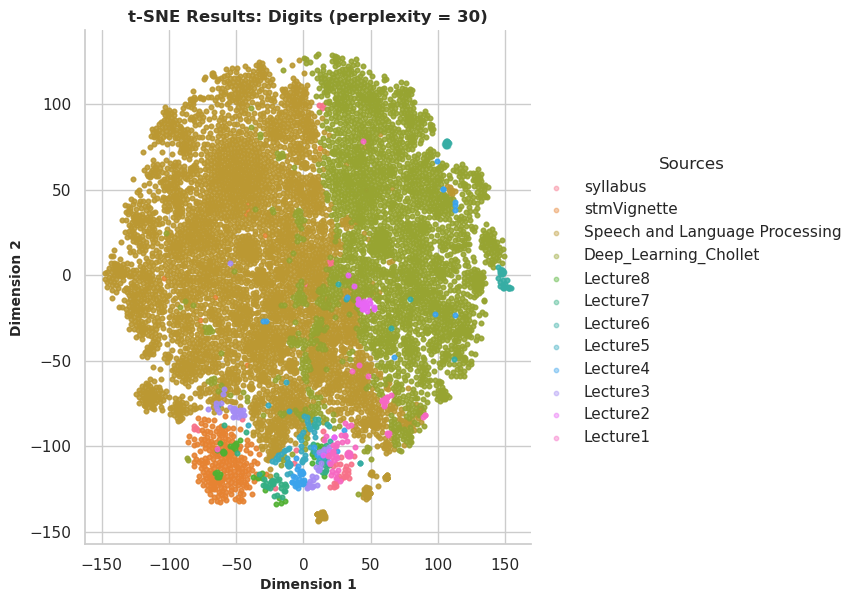

In [50]:
X_tsne_df = pd.DataFrame(X_tsne)
X_tsne_df.columns = ['_DIM_1_','_DIM_2_']
X_tsne_df['Sources'] = df_docs_ex.sources_short

tsne_plot(X_tsne_df, 't-SNE Results: Digits (perplexity = 30)')

In [51]:
print('The End')

The End
